In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

# Logistic Regression

The logistic model uses a logistic function to model a binary dependent variable ($Y\in\{0,1\}$). A logistic regression tries to model the parameters of the logistic function ($\theta$, a vector which contains the betas and intercept).

***

## Some Important Concepts

### Odds

$$\displaystyle{odds = \frac{p}{1-p}}$$

In [2]:
p = 0.5
odds = p/(1-p)
odds

1.0

When $p=0.5$, we have what is called *even odds*.

In [3]:
p = 0.25
odds = p/(1-p)
odds

0.3333333333333333

If $p < 0.5$, $odds$ is in $(0,1)$. If $p > 0.5$, $odds$ is in $(1,\infty)$. But there is an inbalance of sorts because the space for worse odds is restricted into a smaller space than the better odds. So for example, if you're six times as likely to lose as you are to win, then $p=\frac{1}{7}$ and $odds=0.1\bar{6}$. But if you are six times as likely to win as you are to lose, $p=\frac{6}{7}$ and $odds=6$.

### Log Odds (Logit Function)

$$\displaystyle{\ln(odds) = \ln\left(\frac{p}{1-p}\right)}$$

Taking the log of the odds puts the two intervals on the same scale ($\ln(\frac{1}{6}) = -\ln(6)$). The magnitudes are equal, just opposite in direction. This is true for any $p$.

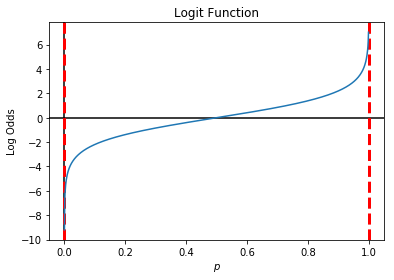

In [4]:
p = np.arange(1e-4,1-1e-4,.001)
y = np.log(p/(1-p))

plt.axhline(y=0,color='k')
plt.axvline(x=0,color='k')
plt.axvline(x=0,linestyle='--',color='r',linewidth=3)
plt.axvline(x=1,linestyle='--',color='r',linewidth=3)
plt.plot(p,y)
plt.xlabel('$p$')
plt.ylabel('Log Odds')
plt.title('Logit Function')
plt.show()

The plot looks as expected. When $p=0.5$, the log odds is $0$ because $odds=1$. The symmetry between the better and worse log-odds demonstrated earlier is also visible in the plot (same magnitude, opposite direction).

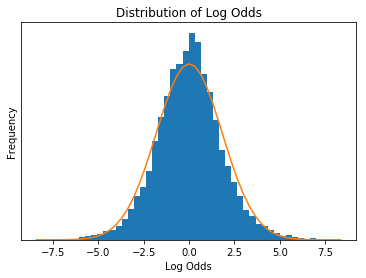

In [5]:
p = np.random.random(10000)
logodds = np.log(p/(1-p))
_,bins,_ = plt.hist(logodds,bins=50,density=True)
mu = logodds.mean()
std = logodds.std()
plt.plot(bins,stats.norm.pdf(bins,mu,std))
plt.xlabel('Log Odds')
plt.yticks([])
plt.ylabel('Frequency')
plt.title('Distribution of Log Odds')
plt.show()

When randomly drawing probabilities, log odds will tend toward a normal distribution. This will be important later on.

### Odds Ratios and Log of Odds Ratios

As the name indicates, an odds ratio is a ratio of odds ($Odds\ Ratio = \displaystyle{\frac{odds_{event_1}}{odds_{event_2}}}$). It can be thought of as a measure of effect size.

Like in the odds, if $event_1$ is less likely to happen, the odds ratio is in $(0,1)$. The odds ratio is $1$ if the odds of both events are equal. It is in $(1,\infty)$ if $event_1$ is more likely to happen. Taking the log of the odds ratio has the same effect of creating the symmetry seen in the log odds. And like the log odds, the log odds ratios also tend toward a normal distribution.

#### Example

Given the example below:
<table>
    <thead>
        <tr><td colspan="2"></td><th colspan="2">Has Cancer</th></tr>
        <tr><td colspan="2"></td><th>Yes</th><th>No</th></tr>
    </thead>
    <tbody>
        <tr><th rowspan="2" style="text-align:left">Has<br>Mutated<br>Gene</th>
            <th style="border-right:1px solid black">Yes</th>
            <td>23</td><td>117</td>
        </tr>
        <tr><th style="border-right:1px solid black">No</th>
            <td>6</td><td>210</td>
        </tr>
    </tbody>
</table>

If we wanted to measure the effect of carrying a gene on having cancer, a way to measure that would be through the odds ratio:

$$\displaystyle{Odds\ Ratio = \frac{odds_{\text{gene carrier has cancer}}}{odds_{\text{person without the gene has cancer}}}=
\frac{\frac{23}{117}}{\frac{6}{210}}} = 6.88$$<br>
$$\ln(6.88) = 1.93$$

The odds are 6.88 times greater that someone with the mutated gene has cancer. A large odds ratio means that the mutated gene might be a good predictor of cancer. Smaller values mean the predictor is not a good predictor. However, this tells us nothing of statistical significance.

The Wald Test takes advantage of the fact demonstrated earlier that log odds and log odds ratios tend toward a normal distribution. It checks how many standard deviations away from $0$ the log odds ratio is. If this is greater than $2$, the p-value calculated would be less than $0.05$.

### Inverse Logit / Logistic Function

In a logistic regression, we want the range to be in $[0,1]$, not the domain, because we want to predict $p$. Also, one of the assumptions of logistic regression is that the predictors and the log odds are linearly related ($\log(odds) = \beta_0 + \beta_1x_1+\dots+\beta_nx_n$). So we have to find the inverse of the logit function to get the formula that returns a probability given the log odds.

$\ln(odds) = \ln\left(\frac{p}{1-p}\right)$

$e^{\ln(odds)} = \frac{p}{1-p}$

$e^{\ln(odds)}(1-p) = p$

$e^{\ln(odds)}-e^{\ln(odds)}p - p = 0$

$e^{\ln(odds)}-p(e^{\ln(odds)}+1) = 0$

$e^{\ln(odds)} = p(e^{\ln(odds)}+1)$

$\displaystyle{p = \frac{e^{\ln(odds)}}{e^{\ln(odds)}+1}}$

$$\displaystyle{logit^{-1}(\alpha) = logistic(\alpha) = \frac{e^{\alpha}}{e^{\alpha}+1} = \frac{1}{1+e^{-\alpha}}}$$

This function can take in the log odds (equated to $\beta_0 + \beta_1x_1+\dots+\beta_nx_n$) and return a predicted probability $\hat{p}$.

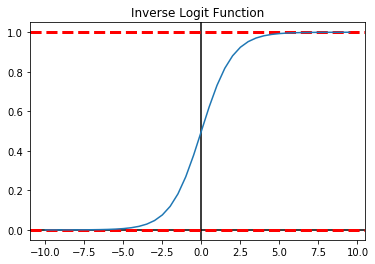

In [6]:
alpha = np.arange(-10,10,0.5)
y = np.exp(alpha)/(np.exp(alpha)+1)

plt.axhline(y=0,color='k')
plt.axvline(x=0,color='k')
plt.axhline(y=0,linestyle='--',color='r',linewidth=3)
plt.axhline(y=1,linestyle='--',color='r',linewidth=3)
plt.plot(alpha,y)
plt.title('Inverse Logit Function')
plt.show()

This is what the logistic function looks like.

***

## Assumptions of Logistic Regression
1. The dependent variable must be binary.
2. The samples must be independent.
3. There must be little multicollinearity between the predictors.
    - Perfect multicollinearity makes estimation impossible
    - Strong multicollinearity makes estimates imprecise
4. The dependent and independent variables need not be related linearly, but the independent variables are related linearly to the log odds.

## Hypothesis Representation

$h_\theta(x) = \displaystyle{\frac{1}{1+e^{-\theta^T x}}}$, where

- $\theta^T x = \beta_0 + \beta_1x_1 + \beta_2x_x + \dots + \beta_nx_n$
    - $\beta_0$ is the intercept
    - $\beta_1,\dots, \beta_n$ are the "effects" of the predictors
    - $x=\begin{bmatrix}1&x_1&\dots&x_n\end{bmatrix}^T$
        - $x_1,\dots,x_n$ are predictors/features
        - $1$ is a constant term to accomodate the intercept term $\beta_0$

The goal of training a logistic regression model is to estimate the parameters $\theta$.

### Interpreting the Parameters
$\beta_0$ is the intercept. This can be interpreted as the log odds when all other predictors are $0$. This may not always have an intuitive/real-world interpretation depending on the nature of the data we're working with (e.g. if predictors are weight and height, then the intercept doesn't really tell us anything because there will never be data points with no weight and no height).

$\beta_1\dots\beta_n$ tell us the change in log odds as we move one unit up in the corresponding predictors $x_1\dots x_n$. For example, if $\beta_1 = 1.3$ and $x_1$ is weight in kg, then this tells us that the log odds of being in category 1 ($y=1$) changes by that amount with every 1 kg increase when all other variables are held constant. Equivalently, with every 1 kg increase, the effect on the odds is $e^{1.3} \approx 3.67$, which means the odds increase by $267\%$.

## Likelihood Function

$$h_\theta(x) = Pr(y=1|x;\theta)$$

The logistic regression model $h_\theta(x)$ gives the probability that $y=1$ given $x$ and the parameters $\theta$. From this, we know that $Pr(y=0|x;\theta) = 1-h_\theta(x)$. Using an exponentiation trick, we can get $Pr(y|x;\theta)$.

$$Pr(y|x;\theta) = h_\theta(x)^{y}(1-h_\theta(x))^{(1-y)}$$

If we assume the data points are Bernoulli distributed,

$$\begin{align*}
\mathcal{L}(\theta|x) &= \displaystyle{\prod_i}Pr(y_i|x_i;\theta)\\
&= \displaystyle{\prod_i}h_\theta(x_i)^{y_i}(1-h_\theta(x_i))^{(1-y_i)}
\end{align*}$$

The log-likelihood function is:

$$\ell(\theta|x) = \displaystyle{\sum_i}[y_ilog(h_\theta(x_i))+(1-y_i)log(1-h_\theta(x_i))]$$

## Negative Log-Likelihood as a Loss Function

The loss function is a function that measures how far off a prediction is from the true label. The negative log-likelihood can serve as a loss function. The loss function below, when applied to a single data point, tells us how close the prediction is to the true label.

$Loss(\hat{y},y) = -(ylog(\hat{y})+(1-y)log(1-\hat{y}))$, where

- $\hat{y} = h_\theta(x)$ is the logistic regression model's prediction given $x$ (I use $\hat{y}$ to simplify the notation)
- $y$ is the true label of the data point

If $y=1$, the second term cancels out, so $Loss(\hat{y},y) = -log(\hat{y})$. On the other hand, if $y=0$, the first term cancels out, so $Loss(\hat{y},y) = -log(1-\hat{y})$

### $y=1$

When $y=1$, we want to penalize any predictions that are close to 0 and reward those that are close to 1. The plot below shows that $Loss = 0$ when $\hat{y} = 1$, but $\displaystyle{\lim_{\hat{y}\to 0}} Loss = +\infty$.

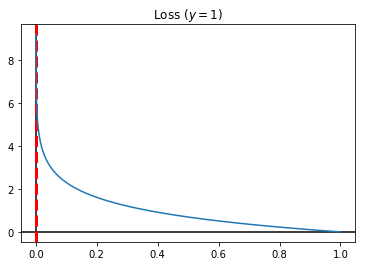

In [7]:
y_hat = np.arange(1e-4,1-1e-4,.001)
loss = -np.log(y_hat)

plt.axvline(x=0,color='k')
plt.axhline(y=0,color='k')
plt.axvline(x=0,linestyle='--',color='r',linewidth=3)
plt.plot(y_hat,loss)
plt.title('Loss ($y=1$)')
plt.show()

### $y=0$

When $y=0$, we want to penalize any predictions that are close to 1 and reward those that are close to 0. The plot below shows that $Loss = 0$ when $\hat{y} = 0$, but $\displaystyle{\lim_{\hat{y}\to 1}} Loss = +\infty$.

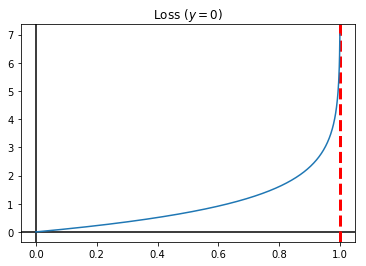

In [8]:
y_hat = np.arange(1e-4,1-1e-4,.001)
loss = -np.log(1-y_hat)

plt.axvline(x=0,color='k')
plt.axhline(y=0,color='k')
plt.axvline(x=1,linestyle='--',color='r',linewidth=3)
plt.plot(y_hat,loss)
plt.title('Loss ($y=0$)')
plt.show()

## Cost Function

For the whole model, we can minimize the cost function by minimizing the sum of the loss across all data points. 

$$\begin{align*}
Cost &= \displaystyle{\frac{1}{m}}\displaystyle{\sum_{i=1}^{m}}Loss(\hat{y}_i,y_i)\\
&= \displaystyle{\frac{1}{m}}\displaystyle{\sum_{i=1}^{m}}-[y_ilog(\hat{y}_i)+(1-y_i)log(1-\hat{y}_i)] \\
&= -\displaystyle{\frac{1}{m}}\displaystyle{\sum_{i=1}^{m}}[y_ilog(\hat{y}_i)+(1-y_i)log(1-\hat{y}_i)]
\end{align*}$$

This cost function will be minimized by optimization methods like gradient descent.

## Multinomial Logistic Regression

In a $K$-class classification problem, $K-1$ logistic regression models could be put together to solve the problem. The $K^{\text{th}}$ class is used as a reference class so we don't need that last model. The choice of reference class is arbitrary. All that matters is that we are consistent. Now the target variable $Y \in \{1,2,\dots,K\}$.

$$\ln\displaystyle{\frac{Pr(Y=1|X=x)}{Pr(Y=K|X=x)}}=\beta_{10}+\beta_{11}x_1+\dots+\beta_{1n}x_n$$<br>
$$\ln\displaystyle{\frac{Pr(Y=2|X=x)}{Pr(Y=K|X=x)}}=\beta_{20}+\beta_{21}x_1+\dots+\beta_{2n}x_n$$<br>
$$\vdots$$<br>
$$\ln\displaystyle{\frac{Pr(Y=K-1|X=x)}{Pr(Y=K|X=x)}}=\beta_{(K-1)0}+\beta_{(K-1)1}x_1+\dots+\beta_{(K-1)n}x_n$$<br>

Manipulating the equations above give the equations for the class probabilities of all classes except $K$:

$$Pr(Y=1|X=x)=Pr(Y=K|X=x)\exp(\beta_{10}+\beta_{11}x_1+\dots+\beta_{1n}x_n)$$<br>
$$Pr(Y=2|X=x)=Pr(Y=K|X=x)\exp(\beta_{20}+\beta_{21}x_1+\dots+\beta_{2n}x_n)$$<br>
$$\vdots$$<br>
$$Pr(Y=K-1|X=x)=Pr(Y=K|X=x)\exp(\beta_{(K-1)0}+\beta_{(K-1)1}x_1+\dots+\beta_{(K-1)n}x_n)$$<br>

And because $\displaystyle{\sum_{k=1}^K}Pr(Y=k|X=x)=1$,

$$Pr(Y=K|X=x)=1-\displaystyle{\sum_{k=1}^{K-1}Pr(Y=k|X=x)}$$<br>

Plugging in the values for the other class probabilities,

$$Pr(Y=K|X=x)=1-\displaystyle{\sum_{k=1}^{K-1}}Pr(Y=K|X=x)\exp(\beta_{k0}+\beta_{k1}x_1+\dots+\beta_{kn}x_n)$$<br>
$$Pr(Y=K|X=x)=1-Pr(Y=K|X=x)\displaystyle{\sum_{k=1}^{K-1}}\exp(\beta_{k0}+\beta_{k1}x_1+\dots+\beta_{kn}x_n)$$<br>
$$Pr(Y=K|X=x)+Pr(Y=K|X=x)\displaystyle{\sum_{k=1}^{K-1}}\exp(\beta_{k0}+\beta_{k1}x_1+\dots+\beta_{kn}x_n)=1$$<br>
$$Pr(Y=K|X=x)\left(1+\displaystyle{\sum_{k=1}^{K-1}}\exp(\beta_{k0}+\beta_{k1}x_1+\dots+\beta_{kn}x_n)\right)=1$$<br>

We get:

$$Pr(Y=K|X=x)=\displaystyle{\frac{1}{1+\sum_{k=1}^{K-1}\exp(\beta_{k0}+\beta_{k1}x_1+\dots+\beta_{kn}x_n)}}$$<br>

Plugging this equation into the set of equations for class probabilities of the other $K-1$ classes, we get:

$$Pr(Y=k|X=x)=\displaystyle{\frac{\exp(\beta_{k0}+\beta_{k1}x_1+\dots+\beta_{(kn}x_n)}{1+\sum_{k=1}^{K-1}\exp(\beta_{k0}+\beta_{k1}x_1+\dots+\beta_{kn}x_n)}}\text{ for }k=1,\dots,K-1$$